In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
res = pd.read_csv("results_occ_temp05.csv")

str_order = "_order"
str_simple = "_match"

model_order = [c for c in res.columns if str_order in c]
model_simple = [c for c in res.columns if str_simple in c]

model_order = [
'llama-3.1-70b_order',
'llama-3.1-8b_order',
'llama-3.2-3b_order',
'mixtral-8x7b_order',
'mistral-7b_order',
'nemo-12b_order',
'llava-v1.6-mistral-7b_order',
'llava-v1.6-mistral-7b-img_order',
'idefics2-8b_order',
'idefics2-8b-img_order',
 ]

model_simple = [m.replace("_order", "_match") for m in model_order]

style = {
            "edgecolor": "black",
            "linewidth": 0.5,
            }

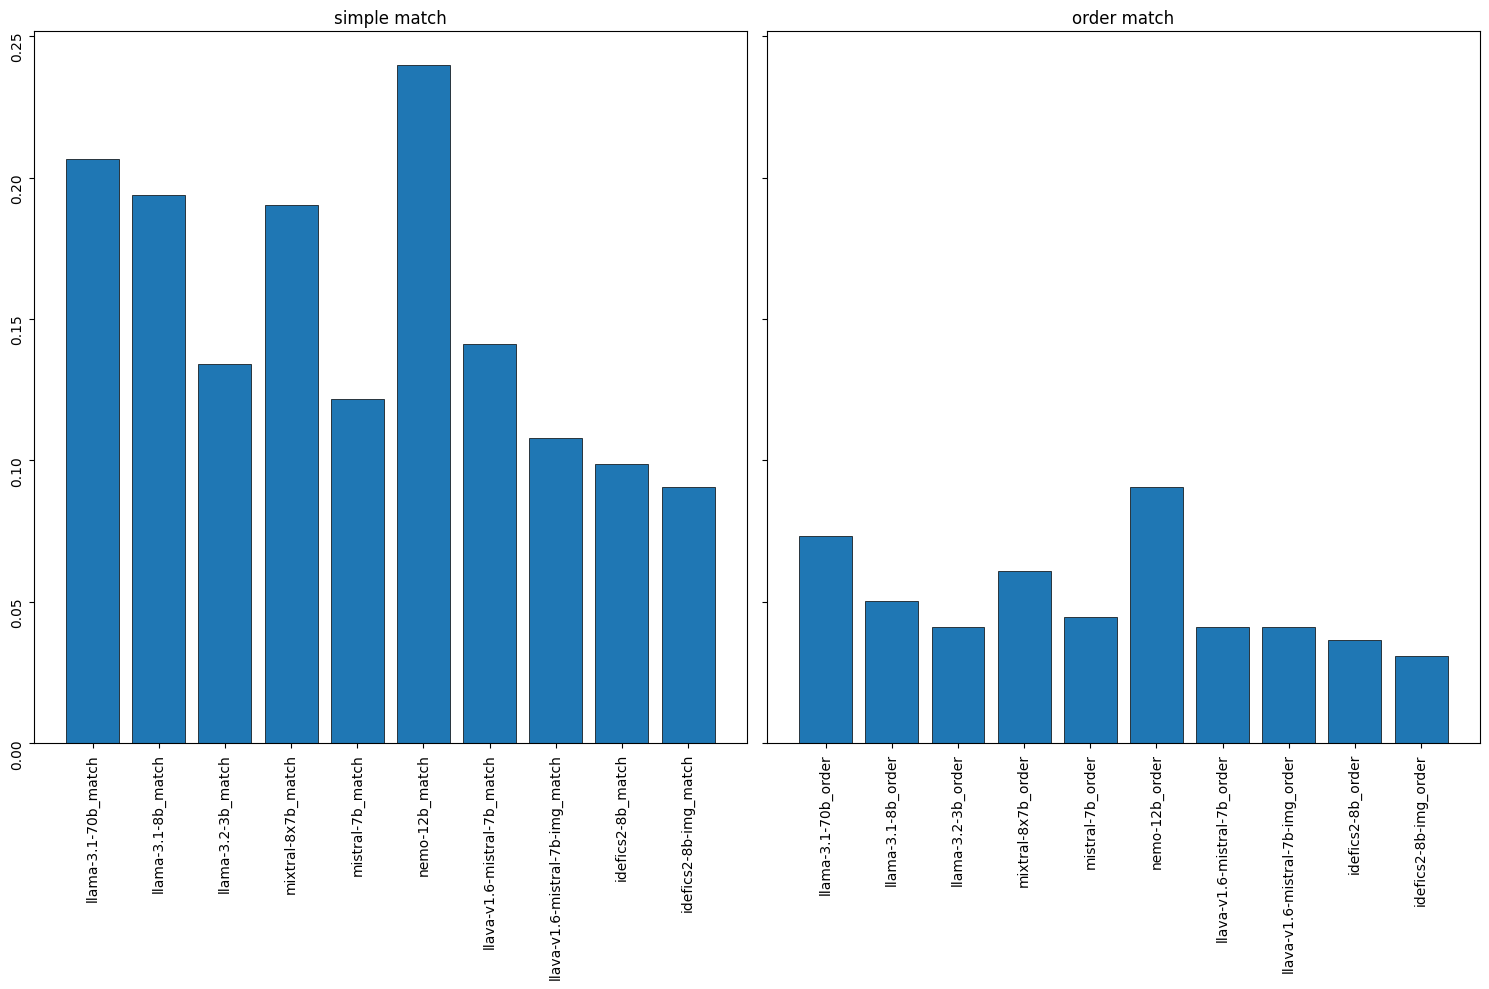

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10), layout="tight", sharey=True)
axs = axs.ravel()

for i, (title, mode_res) in enumerate(zip(["simple match", "order match"], [model_simple, model_order])):
    selected = res[mode_res]
    accs = selected.sum() / len(selected)
    axs[i].bar(x=accs.index, height=accs.values, **style)
    axs[i].tick_params(labelrotation=90)
    axs[i].set_title(title)

fig.show()

plt.savefig("occ_matches.png")